# CS381/780 Data Analytics Final Project

### Due on 12/9/2020 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Your task in the final project is build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped 100



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [4]:
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


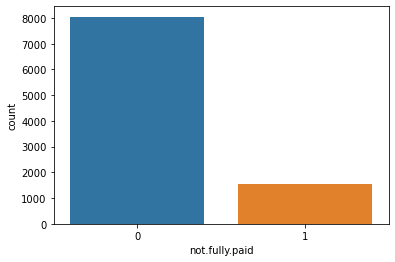

In [5]:
sns.countplot(df['not.fully.paid'])

### Good Luck !!!

Show all your work below

In [6]:
# checking for missing values
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment           True
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

#### There are missimg values in 2 categories: installment and log.annual.inc


In [7]:
#remove missing values
df.dropna(inplace=True)

# check again for missing values
df.isnull().any().sum()

0

### All missing values are removed

### Now explore the relationship between variables.

In [8]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

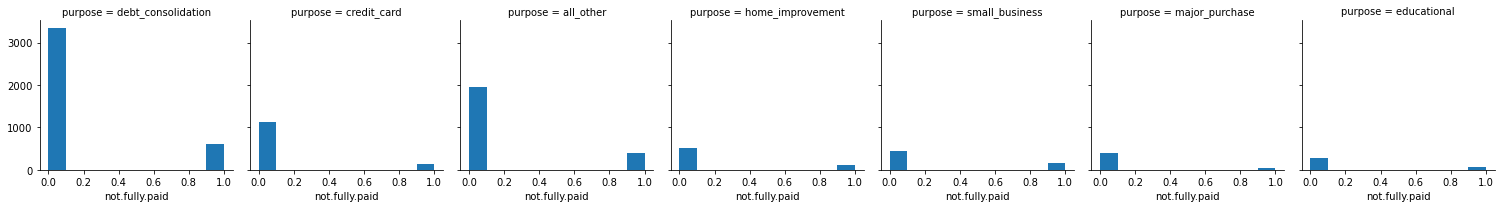

In [9]:
purpose_vs_paid = sns.FacetGrid(df, col = 'purpose')
purpose_vs_paid = purpose_vs_paid.map(plt.hist, 'not.fully.paid')

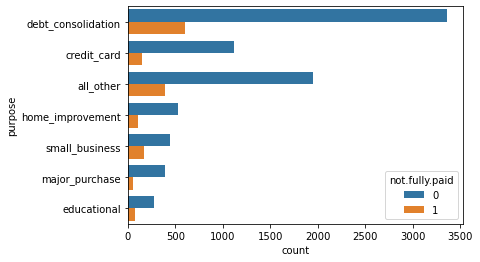

In [10]:
sns.countplot(y = df['purpose'], hue = df['not.fully.paid'])

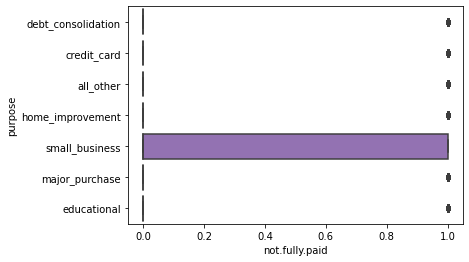

In [11]:
sns.boxplot(x = 'not.fully.paid', y = 'purpose', data = df)

### From the plots above it is seen that borrowers who take loan for small_business do not fully pay the loan more frequently than the borrowers who take the loan for another purpose.


### Now explore another variable: public record

In [12]:
df['pub.rec'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

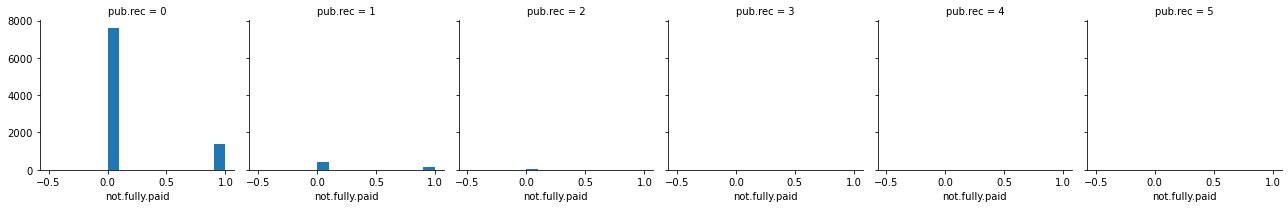

In [13]:
pubrec_vs_paid = sns.FacetGrid(df, col = 'pub.rec')
pubrec_vs_paid = pubrec_vs_paid.map(plt.hist, 'not.fully.paid')

In [14]:
for value in range(0, 5):
    print("Number of records with public record score {}: {}".format(value, (df['pub.rec'] == value).sum()))

Number of records with public record score 0: 9021
Number of records with public record score 1: 533
Number of records with public record score 2: 19
Number of records with public record score 3: 5
Number of records with public record score 4: 1


### The graph shows that with the increase of derogatory public records, the rate of not fully paid loans decreases. Moreover, with the increase of public record score the number of borrowers decreases. additionally, those who have public record score > 3 are more likely to pay the whole loan.

### Next, consider the relationship between not.fully.paid purpose and days.with.cr.line

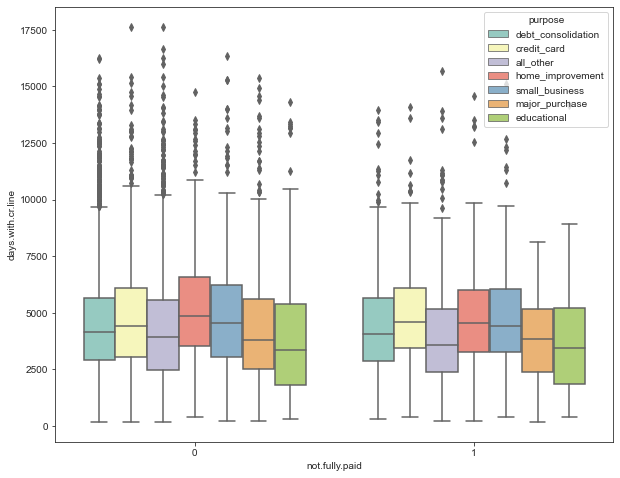

In [15]:
sns.set_style('ticks')
figures, ax = plt.subplots()
figures.set_size_inches(10, 8)
sns.boxplot(x = 'not.fully.paid', y = 'days.with.cr.line', hue = 'purpose', data = df, palette = 'Set3')

### Check the scale of all values in the table to determine how consistent the variables are

In [16]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9.580000e+03,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000
mean,0.805010,0.122642,319.075737,10.932306,12.605959,710.807411,4560.712339,1.691150e+04,46.793265,1.577557,0.163883,0.062109,0.160021
std,0.396213,0.026845,207.051846,0.614887,6.883431,38.674520,2496.672583,3.375310e+04,29.014330,2.200024,0.546292,0.262100,0.366645
min,0.000000,0.060000,15.670000,7.547502,0.000000,50.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.217500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.929887,12.660000,707.000000,4139.958333,8.593000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.487500,11.294769,17.950000,737.000000,5730.000000,1.824450e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,999.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [17]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294040,0.058735,0.035048,-0.090947,0.341439,0.099013,-0.187547,-0.104183,-0.535476,-0.076141,-0.054266,-0.158157
int.rate,-0.294040,1.000000,0.276109,0.056481,0.219959,-0.702092,-0.124028,0.092498,0.464709,0.202791,0.156155,0.098142,0.159513
installment,0.058735,0.276109,1.000000,0.447900,0.050233,0.084782,0.183302,0.233643,0.081412,-0.010431,-0.004468,-0.032743,0.049982
log.annual.inc,0.035048,0.056481,0.447900,1.000000,-0.054205,0.110976,0.336788,0.371944,0.054561,0.029223,0.029659,0.016430,-0.033565
dti,-0.090947,0.219959,0.050233,-0.054205,1.000000,-0.236266,0.060110,0.188777,0.337169,0.029168,-0.021946,0.006233,0.037405
fico,0.341439,-0.702092,0.084782,0.110976,-0.236266,1.000000,0.259155,-0.014916,-0.530336,-0.182094,-0.213867,-0.144651,-0.146485
days.with.cr.line,0.099013,-0.124028,0.183302,0.336788,0.060110,0.259155,1.000000,0.229349,-0.024215,-0.041740,0.081320,0.071831,-0.029226
revol.bal,-0.187547,0.092498,0.233643,0.371944,0.188777,-0.014916,0.229349,1.000000,0.203828,0.022380,-0.033346,-0.030992,0.053729
revol.util,-0.104183,0.464709,0.081412,0.054561,0.337169,-0.530336,-0.024215,0.203828,1.000000,-0.013918,-0.043040,0.066758,0.082168
inq.last.6mths,-0.535476,0.202791,-0.010431,0.029223,0.029168,-0.182094,-0.041740,0.022380,-0.013918,1.000000,0.021301,0.072663,0.149431


### There is a difference in scale among the data features, that is why we  need to normalize the data before analyzing it.

In [18]:
# make a vector of features that need normalization
# the variables are chosen based on the highest value in correlation between not.fully.paid and any other varaiable in the table above 
futures_for_normalization = ['int.rate', 'fico', 'revol.util', 'inq.last.6mths']

#display data before normalization
df[futures_for_normalization]

,int.rate,fico,revol.util,inq.last.6mths
0,0.1189,737,52.1,0
1,0.1071,707,76.7,0
2,0.1357,682,25.6,1
3,0.1008,712,73.2,1
4,0.1426,667,39.5,0
...,...,...,...,...
9576,0.1461,672,82.1,2
9577,0.1253,722,1.1,5
9578,0.1071,687,82.9,8
9579,0.1600,692,3.2,5


In [19]:
# normalize the data from above
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df[futures_for_normalization])
normalized_df = pd.DataFrame(normalized_df, columns = futures_for_normalization, index = df.index)

# display normalized data
normalized_df.head()

,int.rate,fico,revol.util,inq.last.6mths
0,0.376598,0.723920,0.437815,0.000000
1,0.301151,0.692308,0.644538,0.000000
2,0.484015,0.665964,0.215126,0.030303
3,0.260870,0.697576,0.615126,0.030303
4,0.528133,0.650158,0.331933,0.000000


In [20]:
normalized_df = pd.concat([normalized_df[futures_for_normalization], df['not.fully.paid']], axis = 1)
normalized_df.head()

,int.rate,fico,revol.util,inq.last.6mths,not.fully.paid
0,0.376598,0.723920,0.437815,0.000000,0
1,0.301151,0.692308,0.644538,0.000000,0
2,0.484015,0.665964,0.215126,0.030303,0
3,0.260870,0.697576,0.615126,0.030303,0
4,0.528133,0.650158,0.331933,0.000000,0


In [21]:
normalized_df.tail()

,int.rate,fico,revol.util,inq.last.6mths,not.fully.paid
9576,0.550512,0.655427,0.689916,0.060606,1
9577,0.417519,0.708114,0.009244,0.151515,1
9578,0.301151,0.671233,0.696639,0.242424,1
9579,0.639386,0.676502,0.026891,0.151515,1
9580,0.506394,0.718651,0.478992,0.181818,1


### Now, consider the scatter plots of the entire dataset

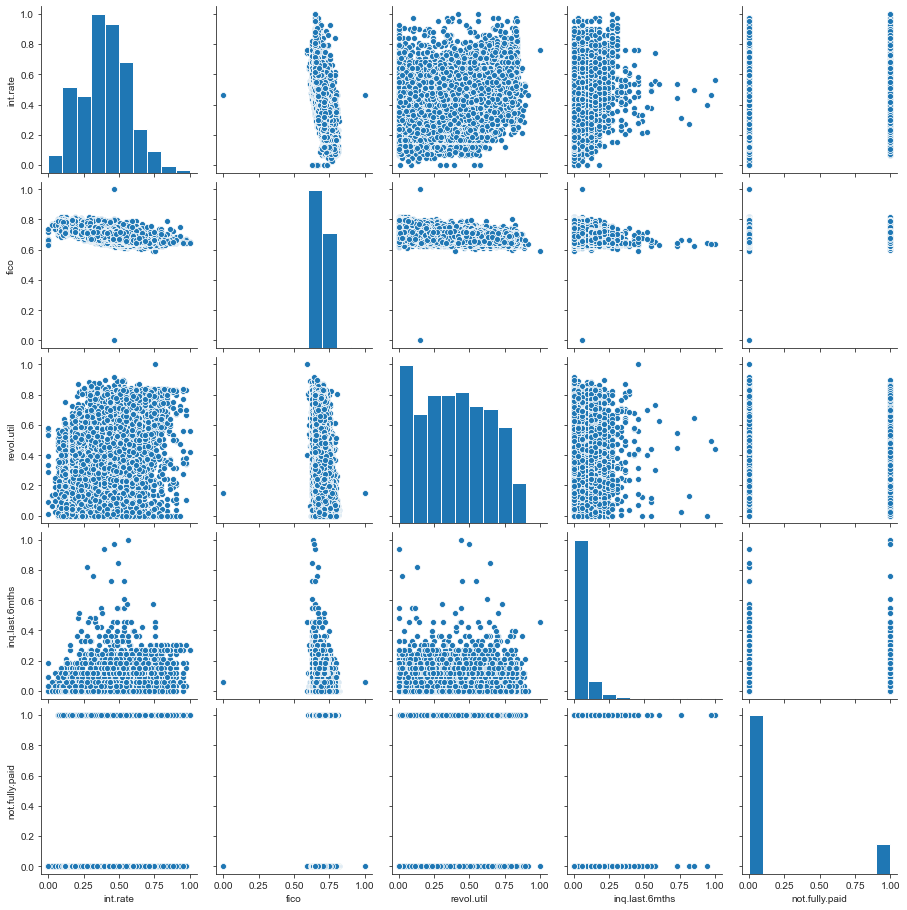

In [22]:
# explore the relationship between variables and visualize the dependencies
sns.pairplot(normalized_df)

### The set of scatterplots above shows some outliers in the following categories:

- int.rate
- fico

## Detect the outliers in each category and remove them

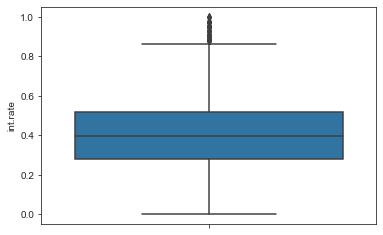

In [23]:
# visualize the range for most of the data points with fico
sns.boxplot(y=normalized_df['int.rate'])

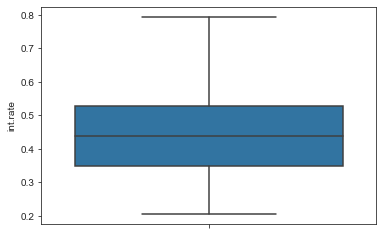

In [24]:
# remove outliers in fico field:
cleaned_data = normalized_df[normalized_df['int.rate'] >= 0.2]
cleaned_data = cleaned_data[cleaned_data['int.rate'] <= 0.8]
sns.boxplot(y=cleaned_data['int.rate'])

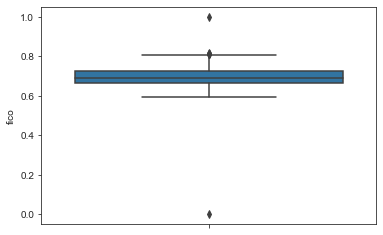

In [25]:
# visualize the range for most of the data points with fico
sns.boxplot(y=normalized_df['fico'])

### The graph indicates that the entire mass of points is located in the following range: [0.6, 0.8].

###  It is seen that there are outlires on both sides of the range

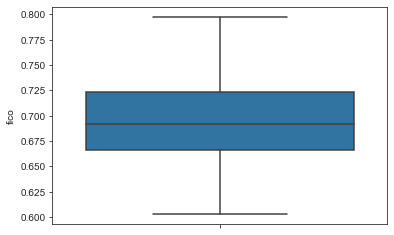

In [26]:
# remove outliers in fico field:
cleaned_data = normalized_df[normalized_df['fico'] >= 0.6]
cleaned_data = cleaned_data[cleaned_data['fico'] <= 0.8]
sns.boxplot(y=cleaned_data['fico'])

### Display the scatter plots of the entire dataset with removed outliers

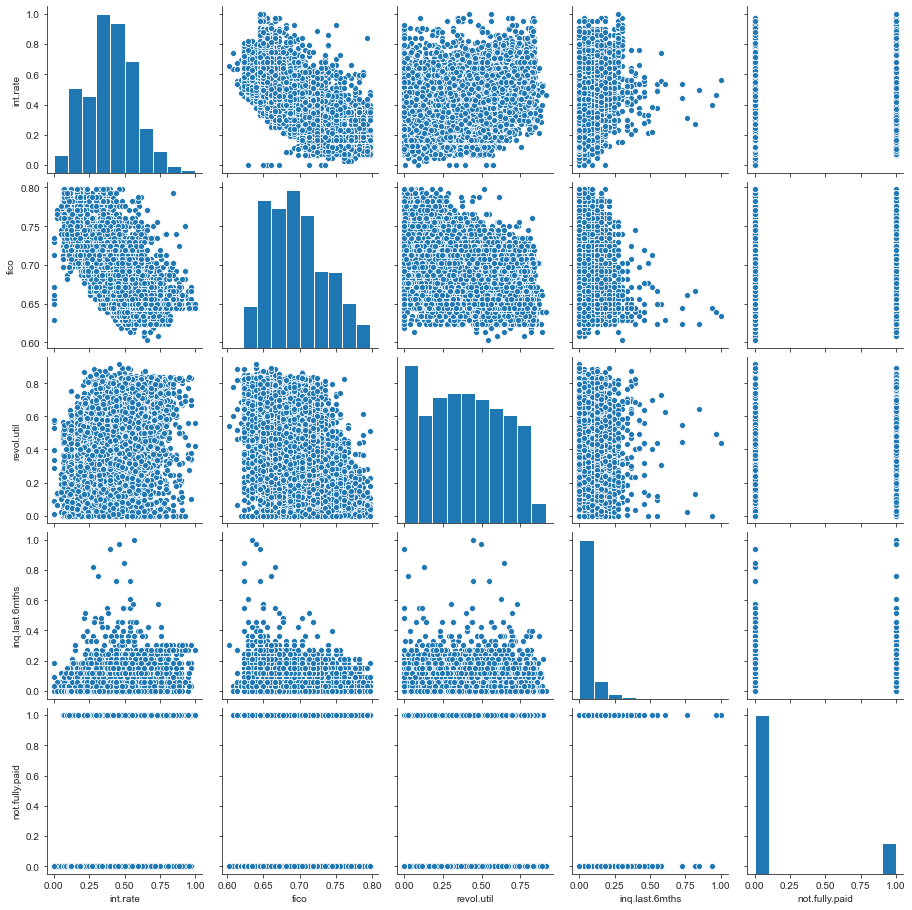

In [27]:
sns.pairplot(cleaned_data)

In [28]:
cleaned_data.corr()

,int.rate,fico,revol.util,inq.last.6mths,not.fully.paid
int.rate,1.000000,-0.716308,0.461252,0.199855,0.158447
fico,-0.716308,1.000000,-0.535030,-0.180193,-0.147448
revol.util,0.461252,-0.535030,1.000000,-0.019852,0.079882
inq.last.6mths,0.199855,-0.180193,-0.019852,1.000000,0.149086
not.fully.paid,0.158447,-0.147448,0.079882,0.149086,1.000000


In [29]:
#Call Train test split
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_data.drop('not.fully.paid', axis = 1), cleaned_data['not.fully.paid'], test_size = 0.2, random_state = 2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7624, 4) (1906, 4) (7624,) (1906,)


In [30]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, Y_train)
model1_predictions = model1.predict(X_test)

print("Naive Bayes Classifier: ")
print(confusion_matrix(Y_test, model1_predictions))
print(classification_report(Y_test, model1_predictions))
print(accuracy_score(Y_test, model1_predictions))

Naive Bayes Classifier: 
[[1543   45]
 [ 281   37]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1588
           1       0.45      0.12      0.18       318

    accuracy                           0.83      1906
   macro avg       0.65      0.54      0.54      1906
weighted avg       0.78      0.83      0.78      1906

0.8289611752360966


In [31]:
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train, Y_train)
model2_predictions = model2.predict(X_test)

print("Random Forest Classifier: ")
print(confusion_matrix(Y_test, model2_predictions))
print(classification_report(Y_test, model2_predictions))
print(accuracy_score(Y_test, model2_predictions))

Random Forest Classifier: 
[[1546   42]
 [ 301   17]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1588
           1       0.29      0.05      0.09       318

    accuracy                           0.82      1906
   macro avg       0.56      0.51      0.50      1906
weighted avg       0.75      0.82      0.77      1906

0.8200419727177335


### Validate the results of the model using 10-fold validation

In [32]:
import random

In [33]:
model1_accuracy = []
print('Result validation for Naive Bayes Classifier:')   
for i in range(10):
    X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(cleaned_data.drop('not.fully.paid', axis = 1), cleaned_data['not.fully.paid'], test_size = 0.2, random_state = random.randint(1, 1000))
    
    model_1 = GaussianNB()
    model_1.fit(X_train_1, Y_train_1)
    Y_pred_1 = model_1.predict(X_test_1)
    model1_accuracy.append(accuracy_score(Y_test_1, Y_pred_1))
    print(accuracy_score(Y_test_1, Y_pred_1)) 

Result validation for Naive Bayes Classifier:
0.832109129066107
0.832109129066107
0.8210912906610703
0.8273871983210913
0.8205666316894019
0.8200419727177335
0.8116474291710388
0.8195173137460651
0.8263378803777545
0.8300104931794333


In [34]:
model2_accuracy = []
print('Result validation for Random Forest Classifier:')   
for i in range(10):
    X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(cleaned_data.drop('not.fully.paid', axis = 1), cleaned_data['not.fully.paid'], test_size = 0.2, random_state = random.randint(1, 1000))
    
    model_2 = RandomForestClassifier(n_estimators = 100)
    model_2.fit(X_train_1, Y_train_1)
    Y_pred_2 = model_2.predict(X_test_1)
    model2_accuracy.append(accuracy_score(Y_test_1, Y_pred_2))
    print(accuracy_score(Y_test_1, Y_pred_2))    

Result validation for Random Forest Classifier:
0.8174186778593914
0.8210912906610703
0.8058761804826863
0.8247639034627492
0.8242392444910808
0.8336831059811123
0.8084994753410283
0.8048268625393494
0.8116474291710388
0.825813221406086


### 10-fold validation shows that the accuracy remains consistent for different test data sets

# The above models are the models that show the best performance out of those that I tested. The models below include more parameters and show not as good performance as the above ones. Yet, for their generation the concept of transforming categorical variables into numerical is used.

In [35]:
cleaned_data_new = cleaned_data
cleaned_data_new.head()

,int.rate,fico,revol.util,inq.last.6mths,not.fully.paid
0,0.376598,0.723920,0.437815,0.000000,0
1,0.301151,0.692308,0.644538,0.000000,0
2,0.484015,0.665964,0.215126,0.030303,0
3,0.260870,0.697576,0.615126,0.030303,0
4,0.528133,0.650158,0.331933,0.000000,0


In [36]:
purpose = pd.get_dummies(df['purpose'], drop_first = True)
cleaned_data_new = pd.concat([cleaned_data_new, purpose],  axis = 1)
cleaned_data_new.head()

,int.rate,fico,revol.util,inq.last.6mths,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0.376598,0.723920,0.437815,0.000000,0.0,0,1,0,0,0,0
1,0.301151,0.692308,0.644538,0.000000,0.0,1,0,0,0,0,0
2,0.484015,0.665964,0.215126,0.030303,0.0,0,1,0,0,0,0
3,0.260870,0.697576,0.615126,0.030303,0.0,0,1,0,0,0,0
4,0.528133,0.650158,0.331933,0.000000,0.0,1,0,0,0,0,0


In [37]:
cleaned_data_new = pd.concat([cleaned_data_new, df['pub.rec']], axis = 1)
cleaned_data_new

,int.rate,fico,revol.util,inq.last.6mths,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,pub.rec
0,0.376598,0.723920,0.437815,0.000000,0.0,0,1,0,0,0,0,0
1,0.301151,0.692308,0.644538,0.000000,0.0,1,0,0,0,0,0,0
2,0.484015,0.665964,0.215126,0.030303,0.0,0,1,0,0,0,0,0
3,0.260870,0.697576,0.615126,0.030303,0.0,0,1,0,0,0,0,0
4,0.528133,0.650158,0.331933,0.000000,0.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9576,0.550512,0.655427,0.689916,0.060606,1.0,0,0,0,0,0,0,0
9577,0.417519,0.708114,0.009244,0.151515,1.0,0,0,0,0,0,0,0
9578,0.301151,0.671233,0.696639,0.242424,1.0,0,1,0,0,0,0,0
9579,0.639386,0.676502,0.026891,0.151515,1.0,0,0,0,1,0,0,0


In [38]:
cleaned_data_new.isnull().any().sum()

5

In [39]:
cleaned_data_new.dropna(inplace=True)
cleaned_data_new.isnull().any().sum()

0

In [40]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(cleaned_data_new.drop('not.fully.paid', axis = 1), cleaned_data_new['not.fully.paid'], test_size = 0.2, random_state = 2)

model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train3, Y_train3)
model3_predictions = model3.predict(X_test3)

print("Random Forest Classifier: ")
print(confusion_matrix(Y_test3, model3_predictions))
print(classification_report(Y_test3, model3_predictions))
print(accuracy_score(Y_test3, model3_predictions))

Random Forest Classifier: 
[[1557   31]
 [ 297   21]]
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      1588
         1.0       0.40      0.07      0.11       318

    accuracy                           0.83      1906
   macro avg       0.62      0.52      0.51      1906
weighted avg       0.77      0.83      0.77      1906

0.8279118572927597


In [41]:
model3_accuracy = []
print('Result validation for Random Forest Classifier:')   
for i in range(10):
    X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(cleaned_data_new.drop('not.fully.paid', axis = 1), cleaned_data_new['not.fully.paid'], test_size = 0.2, random_state = random.randint(1, 1000))
    
    model_3 = RandomForestClassifier(n_estimators = 100)
    model_3.fit(X_train_1, Y_train_1)
    Y_pred_3 = model_3.predict(X_test_1)
    model3_accuracy.append(accuracy_score(Y_test_1, Y_pred_3))
    print(accuracy_score(Y_test_1, Y_pred_3))   

Result validation for Random Forest Classifier:
0.8373557187827911
0.8347324239244491
0.8284365162644282
0.8347324239244491
0.8347324239244491
0.8268625393494229
0.8352570828961176
0.8405036726128017
0.8457502623294858
0.8347324239244491


The validation demonstrates consistency as well